In [1]:
from IPython.display import Image

from google.colab import drive
drive.mount('/g')

Mounted at /g


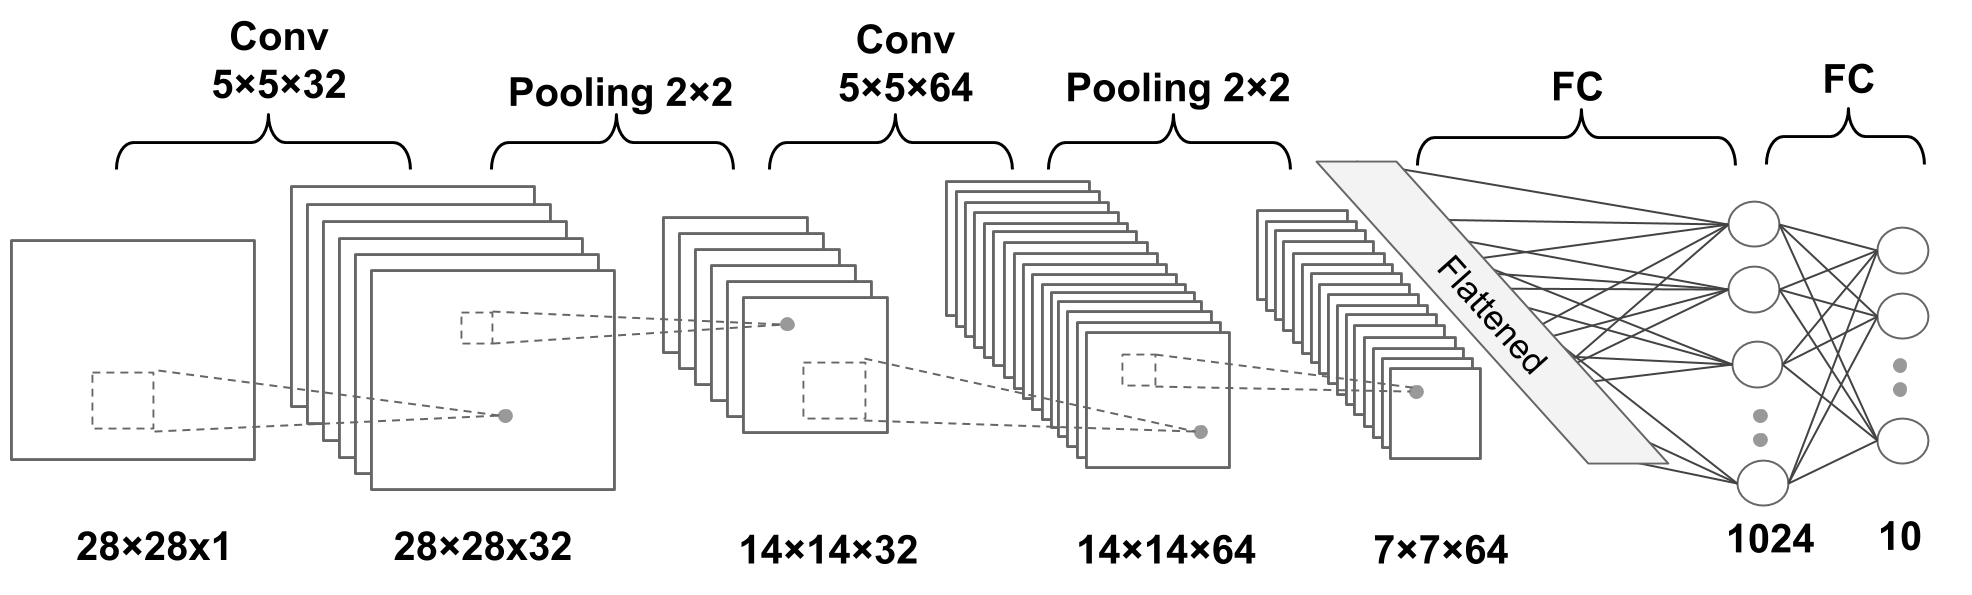

In [2]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

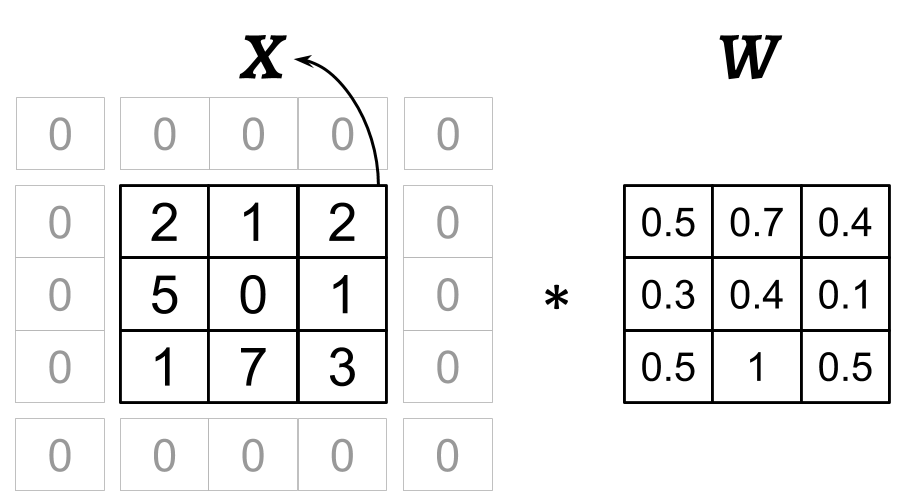

In [3]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_06.png', width=600) 

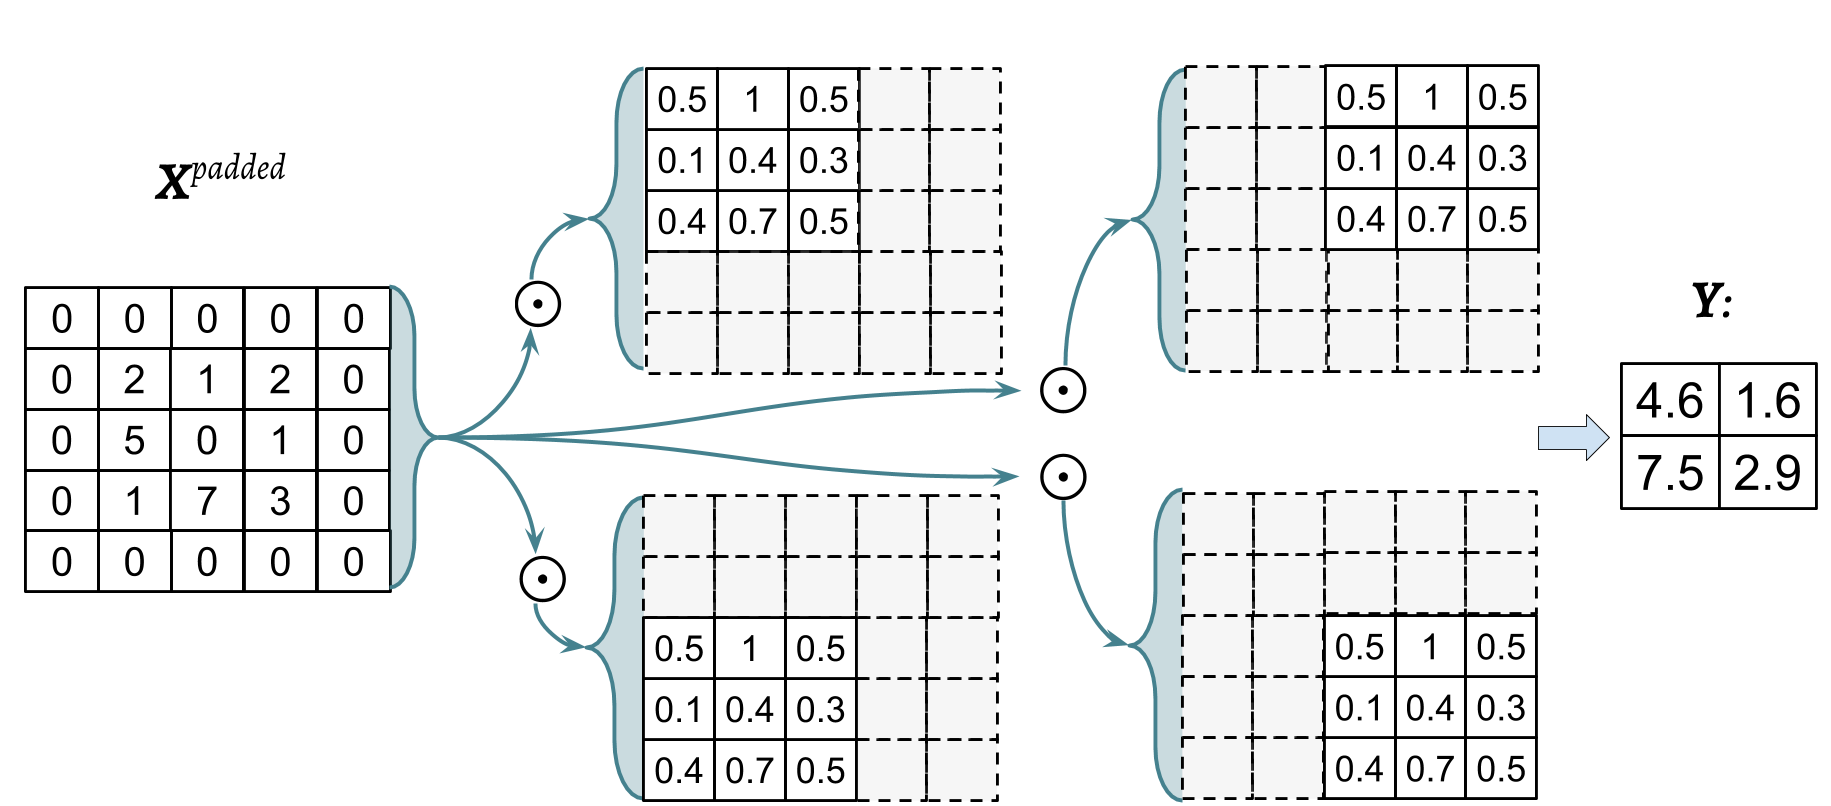

In [4]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_07.png', width=600) 

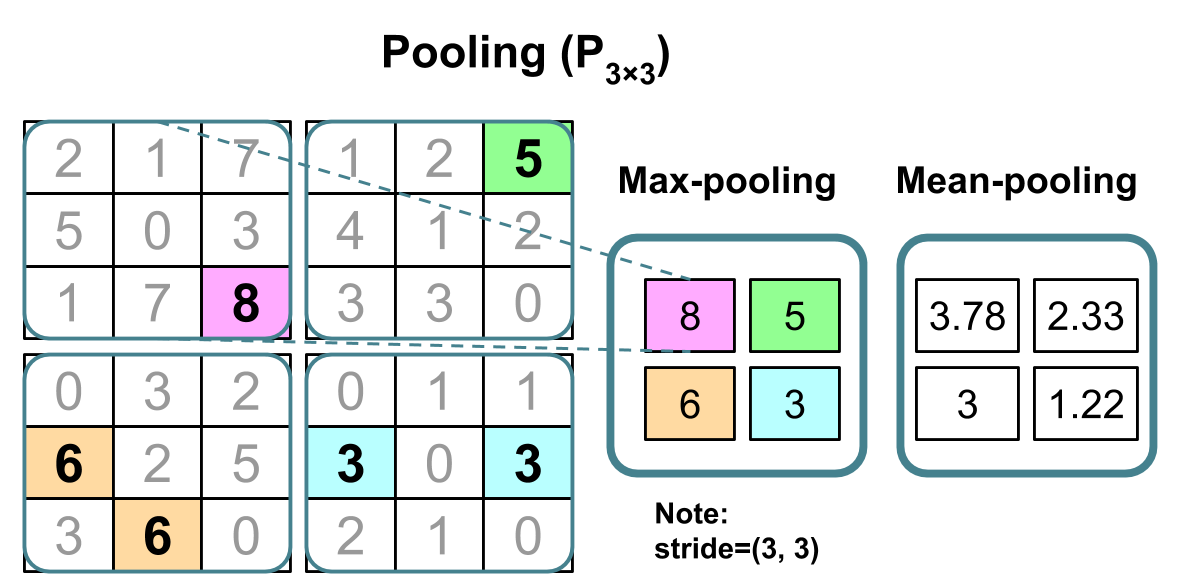

In [5]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_08.png', width=600) 

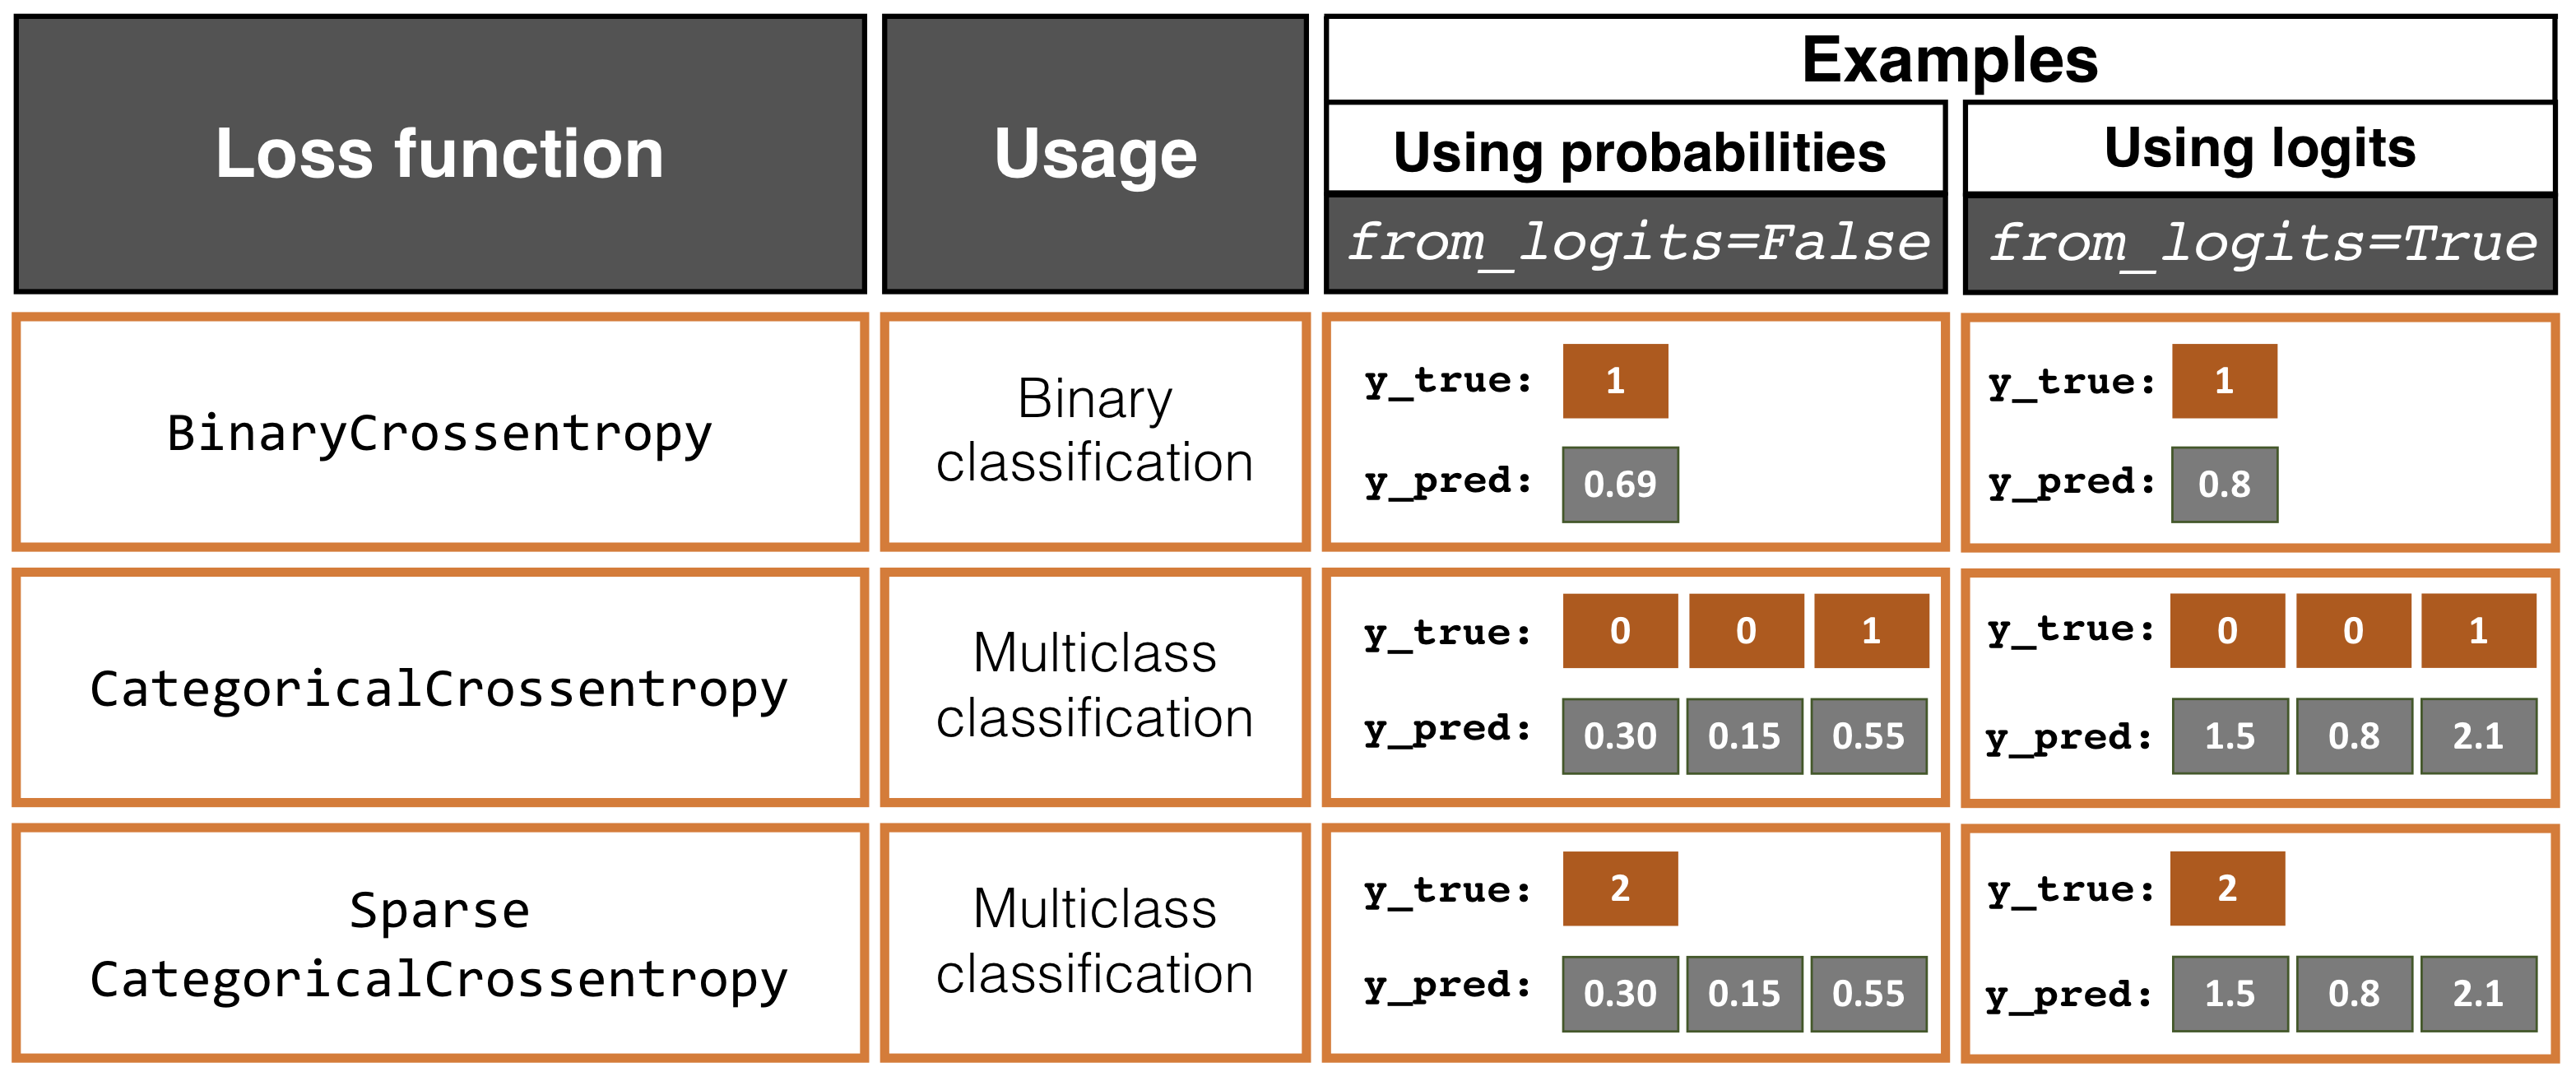

In [6]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_11.png', width=600) 

In [7]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# train set 에서 10000개를 validation set으로 나눔
x_val, y_val = x_train[50000:,:], y_train[50000:]
x_train, y_train = x_train[:50000, :], y_train[:50000]

In [10]:
print(x_train.shape)
print(x_val.shape)

(50000, 28, 28)
(10000, 28, 28)


In [11]:
# 데이터 표준화
import numpy as np
mean = np.mean(x_train, axis=0)

In [12]:
mean.shape

(28, 28)

In [13]:
std = np.std(x_train)

In [14]:
std

78.6661972212754

In [15]:
x_train_centered = (x_train-mean)/std
x_val_centered = (x_val-mean)/std
x_test_centered = (x_test-mean)/std

In [16]:
x_train_centered.shape

(50000, 28, 28)

In [17]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

In [18]:
print(y_train[0])
print(y_train_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


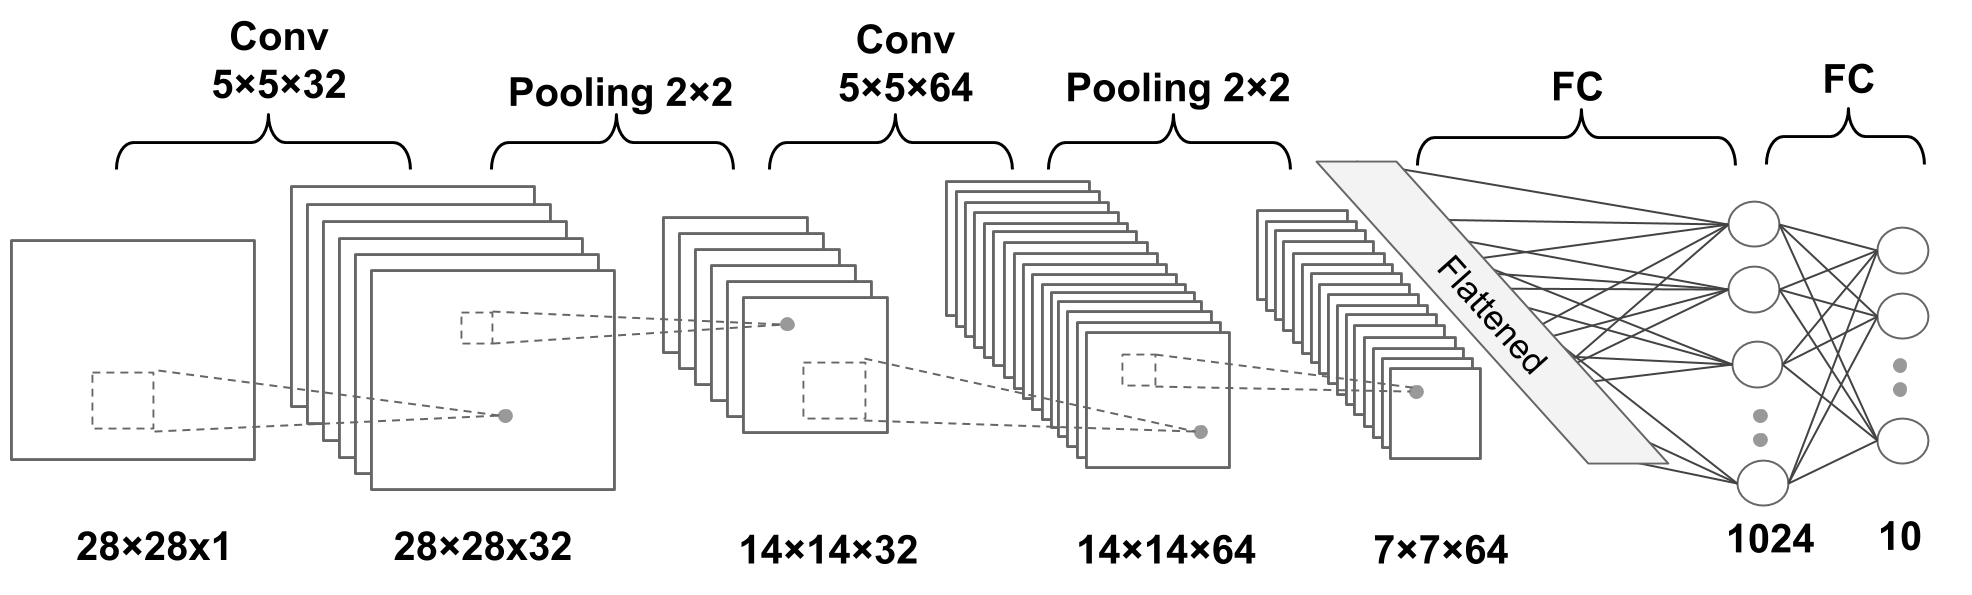

In [19]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

코딩은 아래의 사이즈로 진행하였습니다

28x28x1 --> 24x24x32 --> 12x12x32 --> 8x8x64--> 4x4x64

In [20]:
# model 만들기

from tensorflow.keras import layers, models

model = models.Sequential()

In [21]:
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))

In [22]:
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())


In [23]:
# dense layer에 넣기
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

In [27]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot))

Epoch 1/20
782/782 [==============================] - 36s 9ms/step - loss: 0.1340 - acc: 0.9584 - val_loss: 0.0519 - val_acc: 0.9840
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0497 - acc: 0.9851 - val_loss: 0.0445 - val_acc: 0.9880
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0367 - acc: 0.9885 - val_loss: 0.0356 - val_acc: 0.9896
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0433 - val_acc: 0.9887
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0223 - acc: 0.9931 - val_loss: 0.0425 - val_acc: 0.9898
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0403 - val_acc: 0.9904
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0182 - acc: 0.9938 - val_loss: 0.0617 - val_acc: 0.9863
Epoch 8/20
782/782 [==============================] - 7s 8ms/step - loss: 0

# 데이터 변환 확인

In [29]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[-1.47707574e-03,  7.00224191e-02, -3.09223365e-02,
            8.36751983e-02,  1.31378144e-01,  2.96048541e-02,
           -7.36829964e-03, -2.30187783e-03, -1.66211668e-02,
            6.81972876e-02,  1.04297593e-01, -1.30607728e-02,
            4.30836901e-02,  9.56811826e-04,  1.63470600e-02,
           -5.99554218e-02,  3.90748009e-02, -6.89885616e-02,
           -3.06338747e-03,  8.48652646e-02,  4.82604019e-02,
           -1.89596079e-02, -1.72949154e-02, -5.37628718e-02,
            1.16535790e-01,  8.47051442e-02,  3.59231122e-02,
            2.92260703e-02, -1.06011830e-01, -1.50600478e-01,
            4.83055785e-02, -2.97934301e-02]],
 
         [[-9.36211180e-03, -1.10861987e-01, -7.94389993e-02,
            5.01858182e-02,  1.80129299e-03,  6.37738109e-02,
            5.10932840e-02, -1.25529423e-01,  8.35371912e-02,
           -1.15282526e-02,  1.73813507e-01, -5.86989783e-02,
         

In [30]:
model.layers[0].weights[0].shape

TensorShape([5, 5, 1, 32])

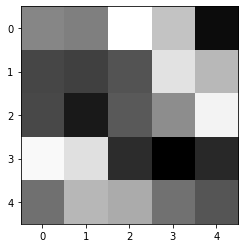

In [31]:
import matplotlib.pyplot as plt

plt.imshow(model.layers[0].weights[0][:,:,0,0], cmap='gray')

In [32]:
# conv2d 확인

conv2d_1 = models.Model(inputs=model.input, outputs=model.layers[0].output)

In [33]:
conv2d_out = conv2d_1.predict(x_train_c[[0]])

In [34]:
x_train_c.shape

(50000, 28, 28, 1)

In [35]:
conv2d_out.shape

(1, 24, 24, 32)

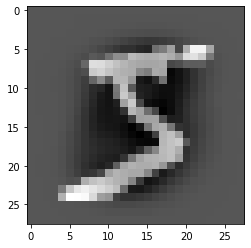

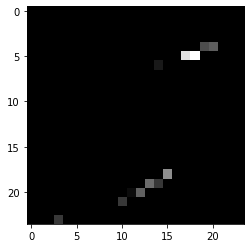

In [36]:
import matplotlib.pyplot as plt

plt.imshow(x_train_c[0,:,:,0], cmap='gray')  # 원본
plt.figure()
plt.imshow(conv2d_out[0,:,:,1],cmap='gray') # convolution

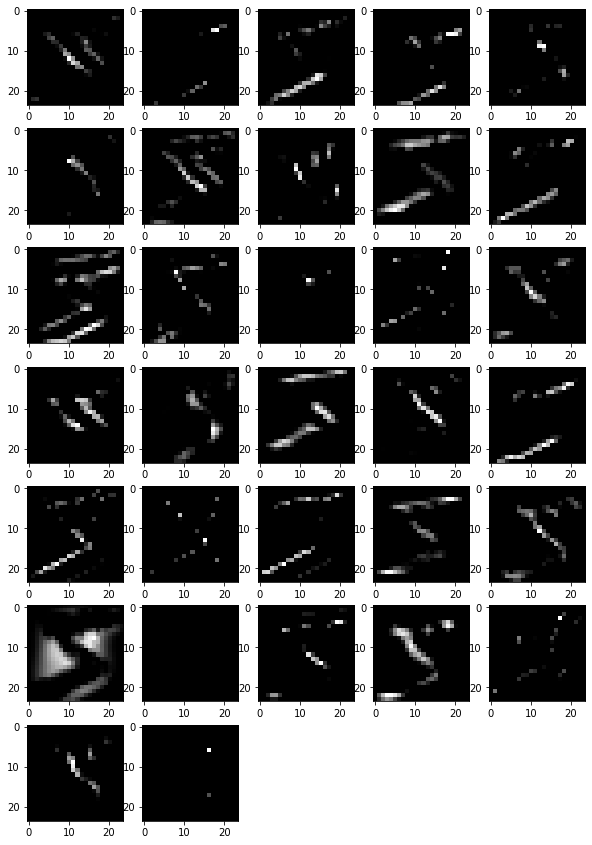

In [37]:
# 32개 필터 적용된 것 확인
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i], cmap='gray')

In [38]:
maxpool_1 = models.Model(inputs=model.input, outputs=model.layers[1].output)

In [39]:
maxpool_out = maxpool_1.predict(x_train_c[[0]])

In [40]:
maxpool_out.shape

(1, 12, 12, 32)

In [41]:
maxpool_out.max()

1.6386082

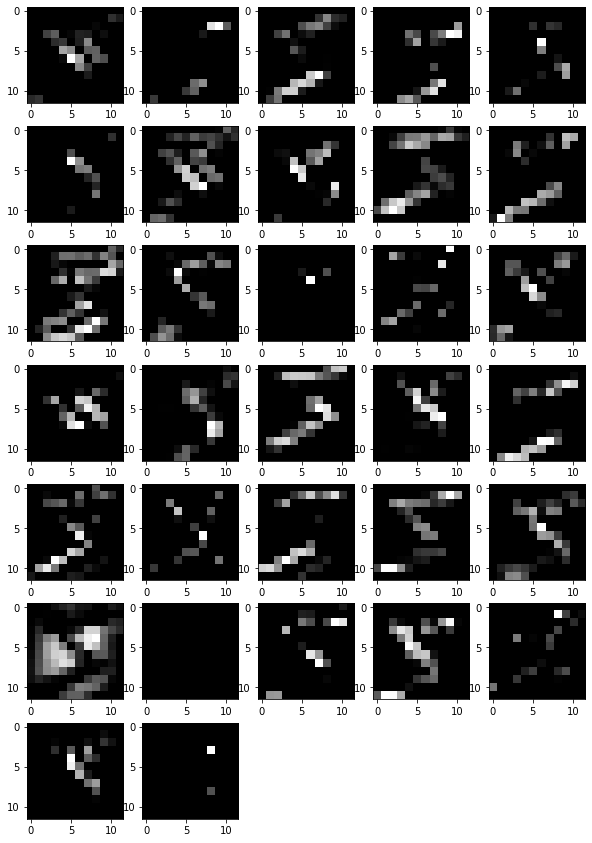

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')

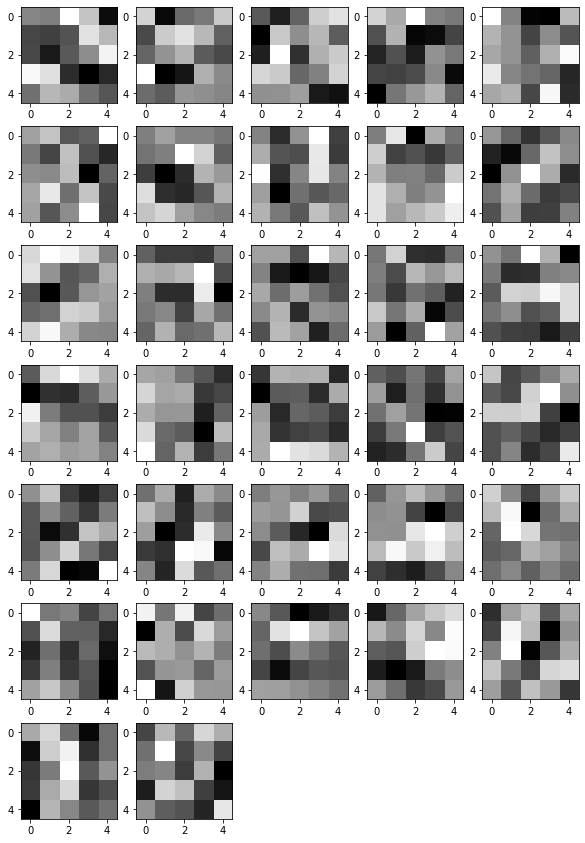

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(model.layers[0].kernel[:,:,0,i], cmap='gray')
plt.show()

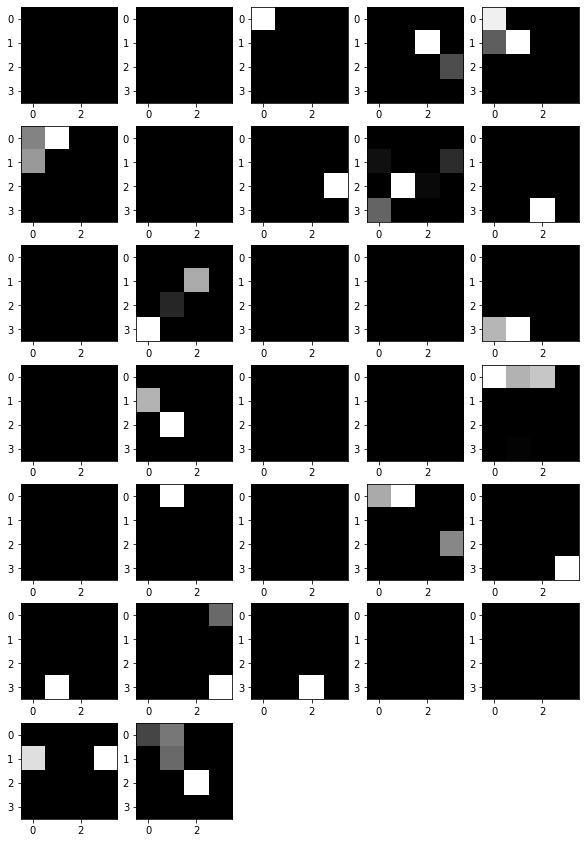

In [44]:
maxpool_3 = models.Model(inputs=model.input, outputs=model.layers[3].output)
maxpool_out = maxpool_3.predict(x_train_c[[0]])
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')
plt.show()

In [45]:
flat = models.Model(inputs=model.input, outputs=model.layers[4].output)
flat_out = flat.predict(x_train_c[[0]])

In [49]:
flat_out.shape

(1, 1024)

In [47]:
import pandas as pd
flat_df = pd.Series(flat_out[0])

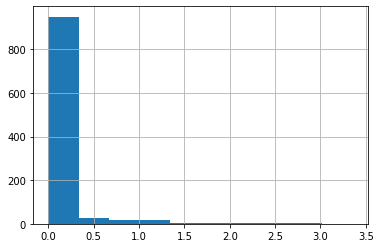

In [48]:
flat_df.hist()

In [52]:
flat_df[flat_df>0].count()

109